In [3]:
import seaborn as sns
from datetime import datetime
import pandas as pd
from scipy.stats import anderson, shapiro, pearsonr, mannwhitneyu
from sklearn.utils import shuffle
from scipy import stats

import numpy as np
import sqlite3
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
table_df = "/Users/mimi/Desktop/PYTHON/TURING/HOME/DA/SPRINT_2/DATA/database.sqlite"
conn = sqlite3.connect(table_df)

podcast = pd.read_sql("""
                    SELECT slug, title, podcast_id
                    FROM podcasts
                    """, conn)

categories = pd.read_sql("""
                        SELECT * 
                        FROM categories
                        """, conn)


reviews =  pd.read_sql("""
                        SELECT podcast_id, title, author_id, created_at, rating
                        FROM reviews
                        """, conn)
reviews.drop(reviews.index[1136903], inplace=True)
#reviews['created_at'] = reviews['created_at'].map(lambda x: x.split("T")[0])

categories['category'] = categories['category'].map(lambda x: x.split("-")[0])
categories['category'] = categories.replace({'category' : {'buddhism':'spirituality', 'christianity':'spirituality', 'hinduism':'spirituality', 'islam':'spirituality', 'judaism':'spirituality', 'religion':'spirituality'}})['category']
categories['category'] = categories.replace({'category' : {"news":'tv', "technology":'science'}})['category']
reviews['created_at'] = pd.to_datetime(reviews['created_at'])
all_ = pd.merge(reviews, categories, on='podcast_id')
all_df = pd.merge(all_, podcast, on='podcast_id')
#all_df.drop_duplicates(subset=['author_id'], inplace=True)
all_df['year'] = all_df['created_at'].dt.year
group_count_df = all_df.groupby(['author_id', 'created_at', 'title_x']).agg({'slug':'count'})
bots_id = group_count_df[group_count_df['slug'] > 1].reset_index()['author_id'].unique()
bot_free_df = all_df[~all_df['author_id'].isin(bots_id)]
bot_free_df['year'] = bot_free_df['created_at'].dt.year




author_id_df = bot_free_df[['author_id', 'rating', 'year']].value_counts().to_frame().reset_index()


author_id_df = author_id_df.groupby(['year', 'author_id']).count().reset_index()

mask = author_id_df[author_id_df['year'] == 2019]['author_id'].isin(author_id_df[author_id_df['year'] == 2020]['author_id'])


year_2020 = all_df[all_df["author_id"].isin(all_df['author_id'][mask[mask == True].index].values)]
year_2020 = year_2020[year_2020['year'] == 2020][['author_id', 'rating']]


year_2019 = all_df[all_df["author_id"].isin(all_df['author_id'][mask[mask == True].index].values)]
year_2019 = year_2019[year_2019['year'] == 2019][['author_id', 'rating']]



author_id_df = bot_free_df[['author_id', 'rating', 'year']].value_counts().to_frame().reset_index()


author_id_df = author_id_df.groupby(['year', 'author_id']).count().reset_index()

mask = author_id_df[author_id_df['year'] == 2019]['author_id'].isin(author_id_df[author_id_df['year'] == 2020]['author_id'])


year_2020 = all_df[all_df["author_id"].isin(all_df['author_id'][mask[mask == True].index].values)]
year_2020 = year_2020[year_2020['year'] == 2020][['author_id', 'rating']]


year_2019 = all_df[all_df["author_id"].isin(all_df['author_id'][mask[mask == True].index].values)]
year_2019 = year_2019[year_2019['year'] == 2019][['author_id', 'rating']]


/var/folders/k1/1bd5lx_d219gy8hl39z8vwx80000gn/T/ipykernel_27469/3244378186.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_free_df['year'] = bot_free_df['created_at'].dt.year


In [ ]:
mask = df['product_name'] == 'Coca Cola'

# select all rows except the ones that contain 'Coca Cola'
df = df[~mask]

# print the resulting DataFrame
print(df)


In [56]:
bot_free_df.drop(bot_free_df.iloc[[175352, 175353]].index, inplace=True)

/var/folders/k1/1bd5lx_d219gy8hl39z8vwx80000gn/T/ipykernel_27469/3868141737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_free_df.drop(bot_free_df.iloc[[175352, 175353]].index, inplace=True)


In [64]:
bot_free_df.iloc[[175352, 175353]]

,podcast_id,title_x,author_id,created_at,rating,category,slug,title_y,year
2495367,adcda062050d5f5f2a83448967c4b75a,Great Ep! And Guest Host!,66741F4E3E17A0A,2013-08-16 09:27:14-07:00,5,tv,retro-rewind-podcast,Retro Rewind Podcast,2013
2495368,adcda062050d5f5f2a83448967c4b75a,Radical,F28A55DD7CCEB21,2013-10-15 07:10:37-07:00,5,tv,retro-rewind-podcast,Retro Rewind Podcast,2013


In [62]:
bot_free_df.to_csv("bot_free.csv", sep=str(','), index=False)


In [66]:
bot_free_df[['author_id', 'created_at', 'rating', 'year']].to_csv("bot_free.csv", sep=str(','), index=False)

In [63]:
bot_free_df[['author_id', 'created_at', 'rating', 'year']].drop(bot_free_df.iloc[[175352, 175353]].index, inplace=True)

/var/folders/k1/1bd5lx_d219gy8hl39z8vwx80000gn/T/ipykernel_27469/316388515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_free_df[['author_id', 'created_at', 'rating', 'year']].drop(bot_free_df.iloc[[175352, 175353]].index, inplace=True)


In [ ]:
'[175352, 175353] not found in axis'

### After inspection, even with the skewness, Non-Gaussian, and independence, a Two Sided Mann-Whiteney U test is appropriate <br>

The Mann-Whitney U test has fewer assumptions, but it does have its own set of requirements:

Independent Samples:
The observations in one sample should be independent of the observations in the other sample. 

Ordinal Data:
The Mann-Whitney U test is suitable for ordinal or continuous data. It does not assume a specific distribution of the data, making it robust to deviations from normality.

Random Sampling:
The data should be collected through a random sampling process to ensure that the results can be generalized to the larger population.

Similar Shapes of Distributions:
While the Mann-Whitney U test is robust to differences in the shapes of the distributions, it is more powerful when the shapes of the distributions are similar.

Equal Variances:
The Mann-Whitney U test does not assume equal variances between the two groups. This makes it applicable when the assumption of homogeneity of variances for the t-test is violated.

In [35]:
np.random.seed(42)
data1 = year_2020['rating'][:len(year_2019['rating'])].values
data2 = year_2019['rating'].values

np.random.shuffle(data1)
np.random.shuffle(data2)


sample_size = 2000  # Choose the desired sample size
data1 = np.random.choice(data1, size=sample_size, replace=False)
data2 = np.random.choice(data2, size=sample_size, replace=False)


In [36]:
test_stat_var, p_value_var= stats.levene(data1,data2)
print("p value:%.4f" % p_value_var)
if p_value_var <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0046
Reject null hypothesis >> The variances of the samples are different.


In [37]:
stat, p = shapiro(data1)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.435, p=0.435
Probably not Gaussian


In [38]:
stat, p = shapiro(data2)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.393, p=0.393
Probably not Gaussian


In [39]:
from scipy.stats import anderson

result = anderson(data1)
print('stat={0:.3g}'.format(result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))


stat=531
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [40]:
from scipy.stats import anderson

result = anderson(data2)
print('stat={0:.3g}'.format(result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))


stat=568
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [41]:
from scipy.stats import pearsonr

stat, p = pearsonr(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.010, p=0.010
Probably independent


Data Type:
data1: ordinal
data2: ordinal


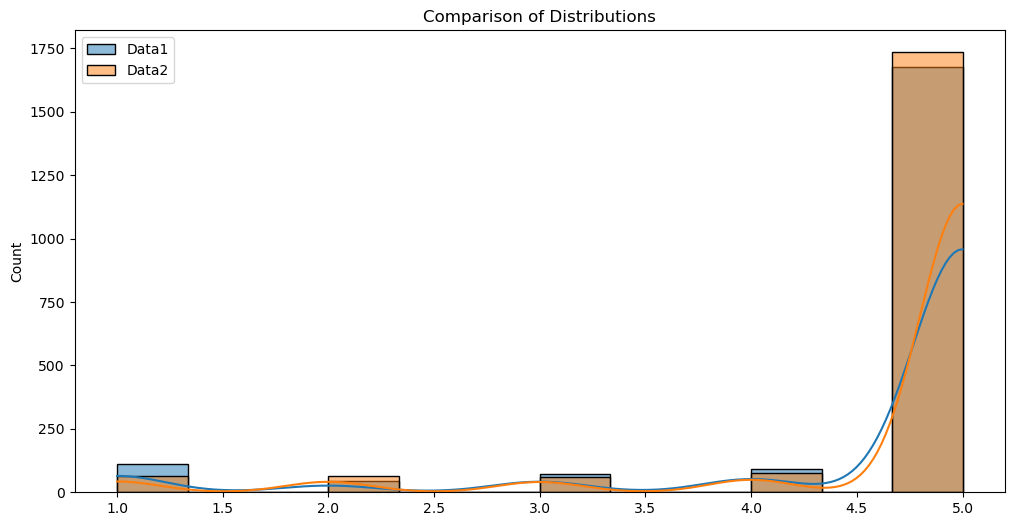

In [42]:


print("Data Type:")
print("data1:", "ordinal" if np.issubdtype(data1.dtype, np.integer) else "continuous")
print("data2:", "ordinal" if np.issubdtype(data2.dtype, np.integer) else "continuous")

# 3. Random Sampling (no specific test, check documentation or source of data)
# ... ensure that data was collected through a random sampling process

# 4. Similar Shapes of Distributions (visual inspection)
plt.figure(figsize=(12, 6))
sns.histplot(data1, label='Data1', kde=True)
sns.histplot(data2, label='Data2', kde=True)
plt.legend()
plt.title('Comparison of Distributions')
plt.show()

Null Hypothesis:
here is no difference between the distributions of the two samples.

Alternative Hypothesis:
There is a difference between the distributions of the two samples.



In [43]:
from scipy.stats import mannwhitneyu

# Assume 'group1' and 'group2' are your two independent groups
statistic, p_value = mannwhitneyu(data1, data2)

# Display results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.01:
    print("There is a statistically significant difference.")
else:
    print("There is no statistically significant difference.")

Mann-Whitney U test statistic: 1939623.5
P-value: 0.007252766832955017
There is a statistically significant difference.


The P-Value is smaller than Alpha. This suggests that there is evidence that the two samples come from populations with different distributions.

We therefore reject the Null Hypothesis 



However, failing to reject H₀ does not mean H₀ is valid, nor does it mean H₁ is wrong.

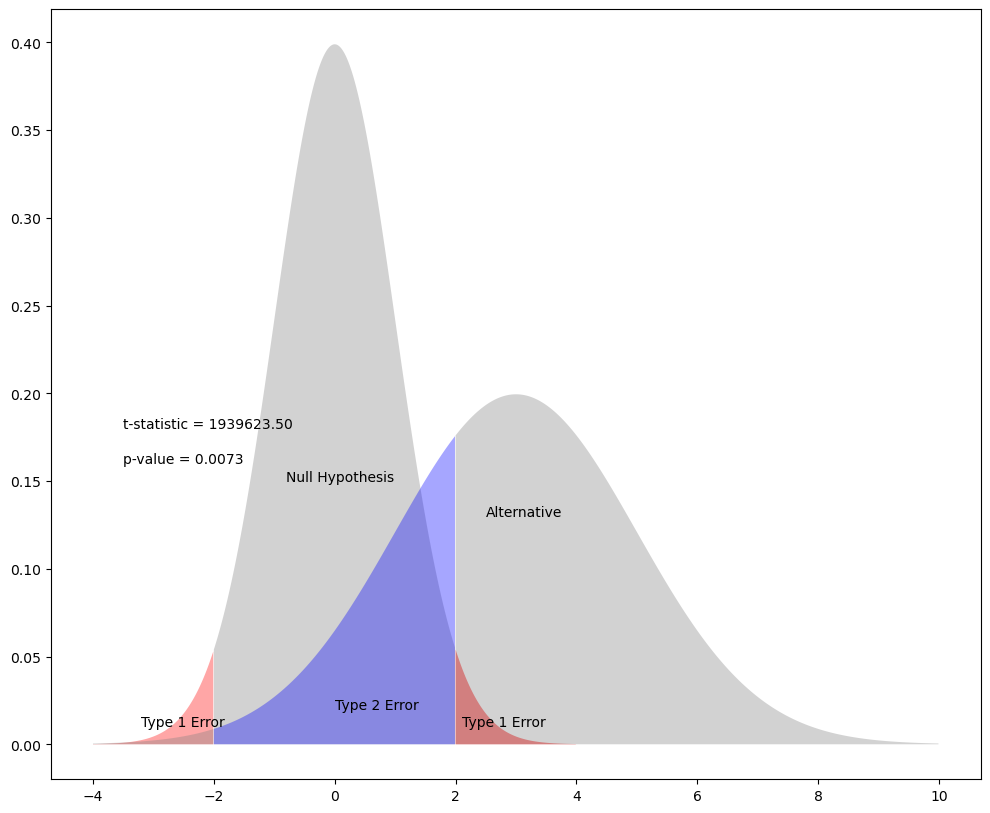

In [44]:


# Set the significance level (alpha)
alpha = 0.05

# Plotting
plt.figure(figsize=(12, 10))

# Shading based on the p-value
if p_value < alpha / 2:
    plt.fill_between(x=np.arange(-4, -2, 0.01),
                     y1=stats.norm.pdf(np.arange(-4, -2, 0.01)),
                     facecolor='red', alpha=0.35)
    plt.fill_between(x=np.arange(2, 4, 0.01),
                     y1=stats.norm.pdf(np.arange(2, 4, 0.01)),
                     facecolor='red', alpha=0.5)
elif p_value < alpha:
    plt.fill_between(x=np.arange(2, 4, 0.01),
                     y1=stats.norm.pdf(np.arange(2, 4, 0.01)),
                     facecolor='red', alpha=0.5)

plt.fill_between(x=np.arange(-2, 2, 0.01),
                 y1=stats.norm.pdf(np.arange(-2, 2, 0.01)),
                 facecolor='grey', alpha=0.35)

plt.fill_between(x=np.arange(-4, -2, 0.01),
                 y1=stats.norm.pdf(np.arange(-4, -2, 0.01), loc=3, scale=2),
                 facecolor='grey', alpha=0.35)

plt.fill_between(x=np.arange(-2, 2, 0.01),
                 y1=stats.norm.pdf(np.arange(-2, 2, 0.01), loc=3, scale=2),
                 facecolor='blue', alpha=0.35)

plt.fill_between(x=np.arange(2, 10, 0.01),
                 y1=stats.norm.pdf(np.arange(2, 10, 0.01), loc=3, scale=2),
                 facecolor='grey', alpha=0.35)

# Text annotations
plt.text(x=-3.5, y=0.18, s=f"t-statistic = {statistic:.2f}", color='black')
plt.text(x=-3.5, y=0.16, s=f"p-value = {p_value:.4f}", color='black')

plt.text(x=-0.8, y=0.15, s="Null Hypothesis")
plt.text(x=2.5, y=0.13, s="Alternative")
plt.text(x=2.1, y=0.01, s="Type 1 Error")
plt.text(x=-3.2, y=0.01, s="Type 1 Error")
plt.text(x=0, y=0.02, s="Type 2 Error")

plt.show()

In [45]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323

we'd fail to reject the null hypothesis about 30% of the time because the distributions are close enough together that they have significant overlap.

https://www.kaggle.com/code/shashwatwork/guide-to-statistical-hypothesis-tests-in-python

https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

https://www.kaggle.com/code/shashwatwork/guide-to-statistical-hypothesis-tests-in-python